<a href="https://colab.research.google.com/github/Vishnut09/ML-Intern-_-Assignment/blob/main/ML_Intern___Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For model interpretation
import shap

# Flask for deployment
from flask import Flask, request, jsonify
import joblib


In [2]:
# Load the dataset
data= pd.read_excel('/content/Assignment_Data.xlsx')

data


,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54
...,...,...,...,...,...,...,...,...,...,...,...
195,CUST0196,Male,32,61,113.54,9607.02,Credit Card,Yes,80,39,147
196,CUST0197,Male,47,67,133.12,4380.96,PayPal,No,21,46,62
197,CUST0198,Female,61,9,96.09,1599.30,Credit Card,No,56,23,154
198,CUST0199,Male,24,45,142.44,3527.95,PayPal,Yes,69,15,118


In [3]:
# Display the first few rows
data.head()



,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [4]:
#Get dataset info (data types, missing values)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [5]:
# Describe dataset (summary statistics)
data.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


In [27]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'PaymentMethod', 'Churn', 'ServiceUsage1',
       'ServiceUsage2', 'ServiceUsage3', 'average_spend', 'AvgSpendPerMonth'],
      dtype='object')


In [6]:
# Check for missing values
print(data.isnull().sum())


CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64


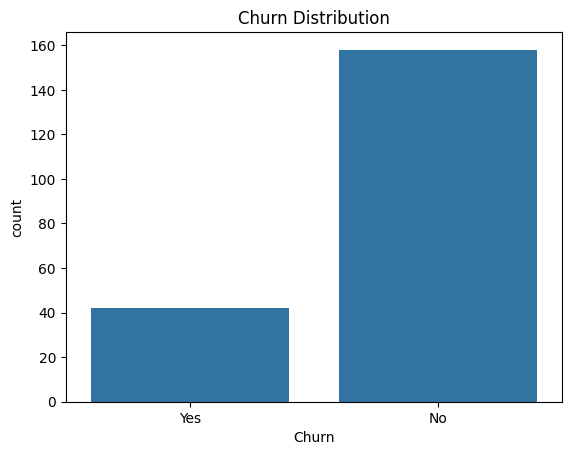

In [18]:
# Plot the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()



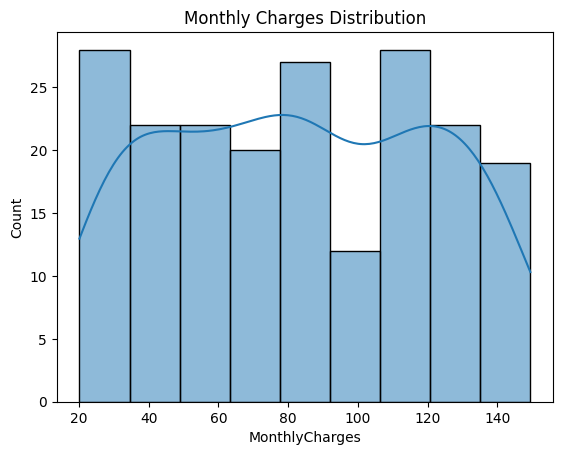

In [19]:

# Distribution of 'MonthlyCharges'
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()



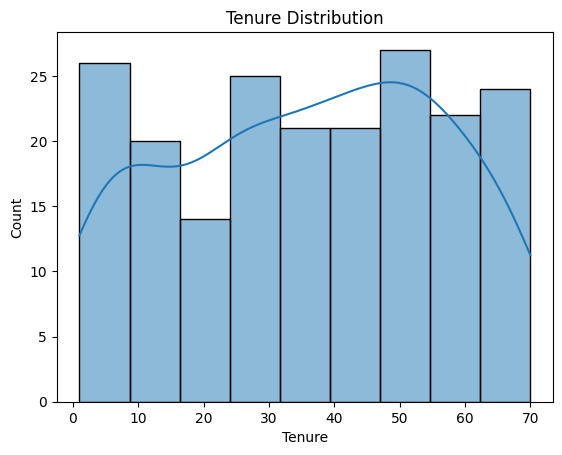

In [20]:
# Distribution of 'Tenure'
sns.histplot(data['Tenure'], kde=True)
plt.title('Tenure Distribution')
plt.show()

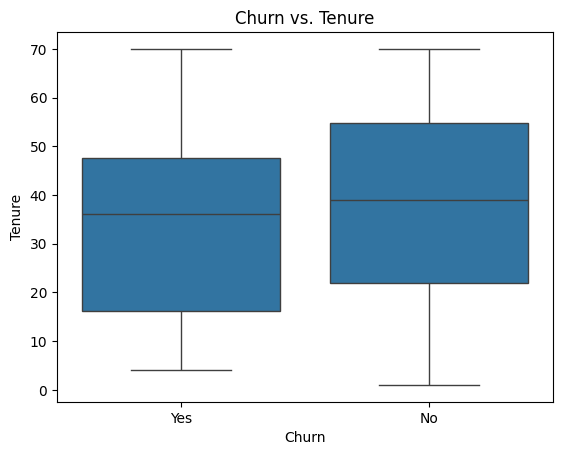

In [21]:
# Churn vs. Tenure
sns.boxplot(x='Churn', y='Tenure', data=data)
plt.title('Churn vs. Tenure')
plt.show()




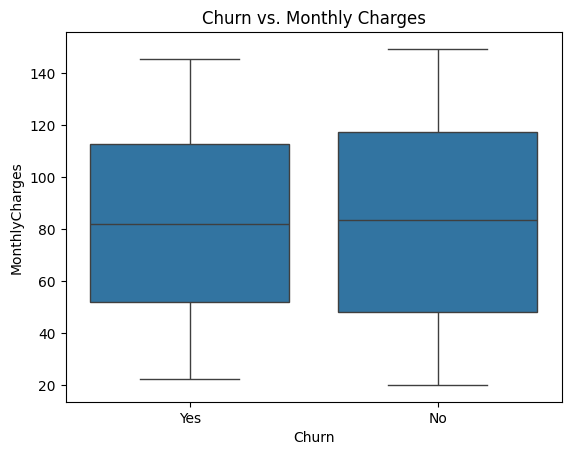

In [22]:
# Churn vs. MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Churn vs. Monthly Charges')
plt.show()



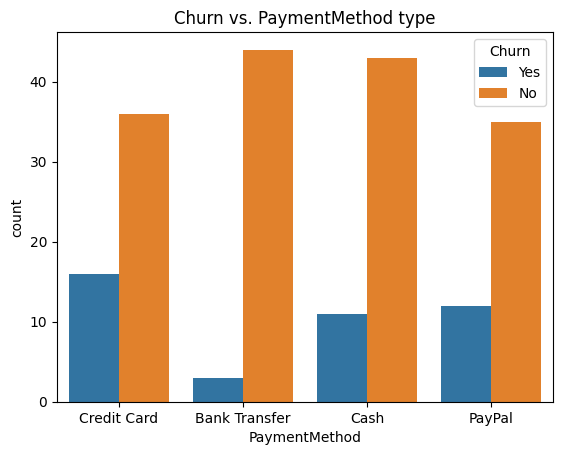

In [24]:
# Churn vs. Contract Type
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn vs. PaymentMethod type')
plt.show()

In [28]:
# Create new features
data['AvgSpendPerMonth'] = data['MonthlyCharges'] * data['Tenure']

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Scale numerical variables
scaler = StandardScaler()
numerical_columns = ['MonthlyCharges', 'Tenure', 'AvgSpendPerMonth']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']


In [29]:
# Create new features
data['average_spend'] = data['TotalCharges'] / data['Tenure']

# Encode categorical variables
# Assuming these are the correct column names from your DataFrame
categorical_features = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['Tenure', 'MonthlyCharges', 'average_spend']  # Updated to match DataFrame columns

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Import necessary classes

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features) # sparse=False for compatibility
    ])

In [30]:
# 4. Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split data
# Drop 'CustomerID' column as it's not relevant for prediction
X = data.drop(['Churn', 'CustomerID'], axis=1)  # Exclude 'CustomerID' here
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[30  1]
 [ 9  0]]

Model: Decision Tree
Accuracy: 0.775
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[28  3]
 [ 6  3]]

Model: Random Forest
Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[30  1]
 [ 9  0]]



In [31]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Definitions
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and Evaluate Models
metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    print(f"\n{model_name} - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Metrics
for model, metric in metrics.items():
    print(f"\n{model} Metrics:")
    for key, value in metric.items():
        print(f"{key}: {value:.2f}")

# Choose Best Model (e.g., Random Forest)
best_model = models["Random Forest"]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Confusion Matrix:
 [[30  1]
 [ 9  0]]

Decision Tree - Confusion Matrix:
 [[29  2]
 [ 6  3]]

Random Forest - Confusion Matrix:
 [[30  1]
 [ 9  0]]

Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Decision Tree Metrics:
Accuracy: 0.80
Precision: 0.60
Recall: 0.33
F1 Score: 0.43

Random Forest Metrics:
Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [32]:
# Split the data
X = data.drop('Churn', axis=1)  # Change 'churn' to 'Churn'
y = data['Churn']  # Change 'churn' to 'Churn'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Ensure categorical_features are in X_train
categorical_features = [col for col in categorical_features if col in X_train.columns]

# Update preprocessor with the correct categorical_features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features) # sparse=False for compatibility
    ])

# Train and evaluate models
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.50      0.11      0.18         9

    accuracy                           0.78        40
   macro avg       0.64      0.54      0.53        40
weighted avg       0.72      0.78      0.71        40

[[30  1]
 [ 8  1]]
Decision Tree Accuracy: 0.525
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        31
           1       0.14      0.22      0.17         9

    accuracy                           0.53        40
   macro avg       0.44      0.42      0.42        40
weighted avg       0.60      0.53      0.56        40

[[19 12]
 [ 7  2]]
Random Forest Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        31
           1       0.29      0.22      0.25         9

    accuracy                           0.70       

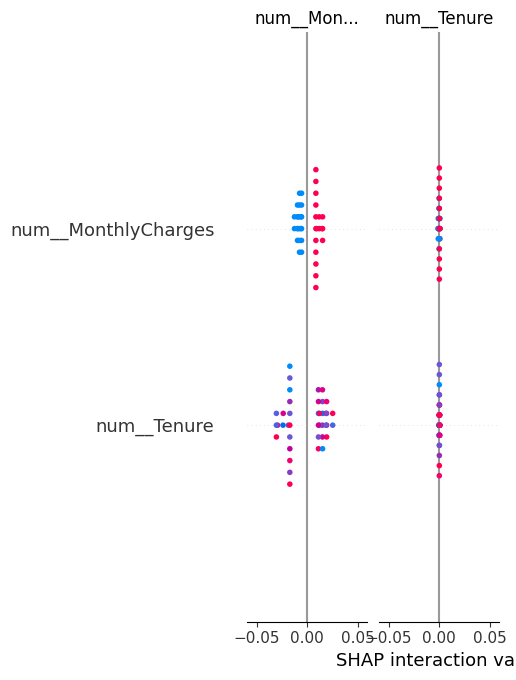

In [33]:
# SHAP values for interpretation
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_train)
shap_values = explainer(X_test)

# Plot SHAP values
# Get feature names from preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Use feature_names directly (no need to convert to list)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [34]:
# Example Recommendation Engine using Collaborative Filtering
# Create a matrix of customer vs. services/products (hypothetical)
# This assumes you have a "products" column
if "products" in data.columns:
    product_matrix = data.pivot_table(index='customer_id', columns='products', values='purchase_count').fillna(0)
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_matrix = cosine_similarity(product_matrix)

    # Recommend products for a given customer ID
    def recommend_products(customer_id, n_recommendations=3):
        customer_index = data.index[data['customer_id'] == customer_id].tolist()[0]
        similar_customers = similarity_matrix[customer_index]
        similar_indices = similar_customers.argsort()[-n_recommendations-1:-1][::-1]
        recommendations = product_matrix.columns[similar_indices]
        return recommendations


In [ ]:
# Save the Model
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Flask App
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Load input data from request
    data = request.json
    df = pd.DataFrame(data, index=[0])

    # Preprocess input data
    for col in categorical_columns:
        df[col] = encoder.transform(df[col])
    df[numerical_columns] = scaler.transform(df[numerical_columns])

    # Load the trained model
    with open("model.pkl", "rb") as file:
        model = pickle.load(file)

    # Predict churn probability
    churn_prob = model.predict_proba(df)[:, 1]
    result = {"Churn Probability": churn_prob[0]}
    return jsonify(result)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
